In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print(pd.__version__)

2.3.3


In [37]:
# CSV 파일 읽기
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# 전국 데이터 제외
df = df[df['행정기관'] != '전국'].copy()

# 데이터 확인
print(f'데이터 shape: {df.shape}')
df.head()

데이터 shape: (17, 8)


,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [38]:
# 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 1 to 17
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정기관코드  17 non-null     int64  
 1   행정기관    17 non-null     object 
 2   총인구수    17 non-null     int64  
 3   세대수     17 non-null     int64  
 4   세대당 인구  17 non-null     float64
 5   남자 인구수  17 non-null     int64  
 6   여자 인구수  17 non-null     int64  
 7   남여 비율   17 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.2+ KB


In [39]:
# 기본 통계량 확인
df.describe()

,행정기관코드,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
count,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,17.000000
mean,3.764706e+09,3.012778e+06,1.418760e+06,2.105294,1.499901e+06,1.512876e+06,1.000588
std,1.149424e+09,3.391363e+06,1.527790e+06,0.115006,1.683112e+06,1.709272e+06,0.034726
min,1.100000e+09,3.906850e+05,1.634320e+05,1.960000,1.944130e+05,1.962720e+05,0.930000
25%,2.900000e+09,1.439157e+06,6.877570e+05,2.020000,7.172910e+05,7.218660e+05,0.990000
50%,4.100000e+09,1.788819e+06,9.124120e+05,2.090000,9.023800e+05,8.864390e+05,1.000000
75%,4.700000e+09,3.021010e+06,1.373827e+06,2.140000,1.509243e+06,1.511767e+06,1.020000
max,5.200000e+09,1.369468e+07,6.058202e+06,2.390000,6.882186e+06,6.812499e+06,1.060000


In [40]:
# 1. 지역별 총인구수 Top5 추출
top5_pop = df.sort_values(by = '총인구수', ascending=False).head(5)
top5_pop[['행정기관', '총인구수']]

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


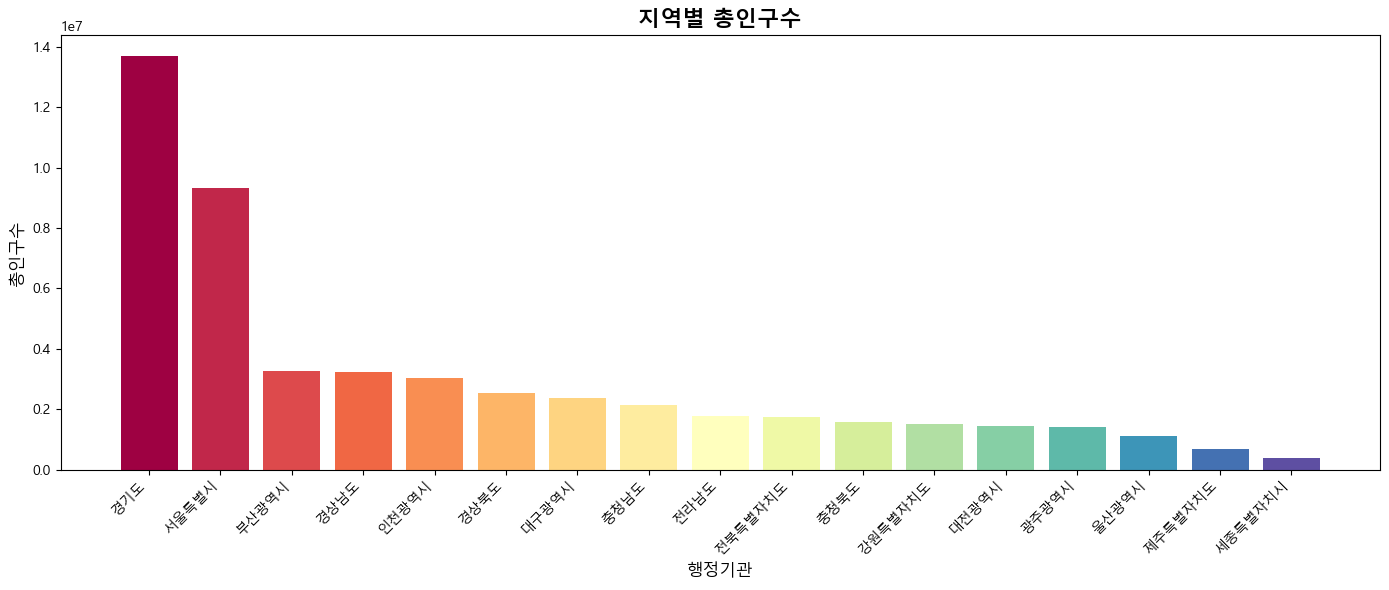

In [41]:
# 1-1 지역별 총인구수 plot
# 지역별 총인구수 정렬
df_sorted = df.sort_values('총인구수', ascending=False)

# 그래프 그리기
plt.figure(figsize=(14, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(df_sorted)))
bars = plt.bar(range(len(df_sorted)), df_sorted['총인구수'], color=colors)

plt.title('지역별 총인구수', fontsize=16, fontweight='bold')
plt.xlabel('행정기관', fontsize=12)
plt.ylabel('총인구수', fontsize=12)
plt.xticks(range(len(df_sorted)), df_sorted['행정기관'], rotation=45, ha='right')

# y축
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()

In [44]:
# 2. 세대당 인구수 높은 지역 Top5
top5_house = df.nlargest(5, '세대당 인구')[['행정기관', '세대당 인구']].reset_index(drop=True)
top5_house

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


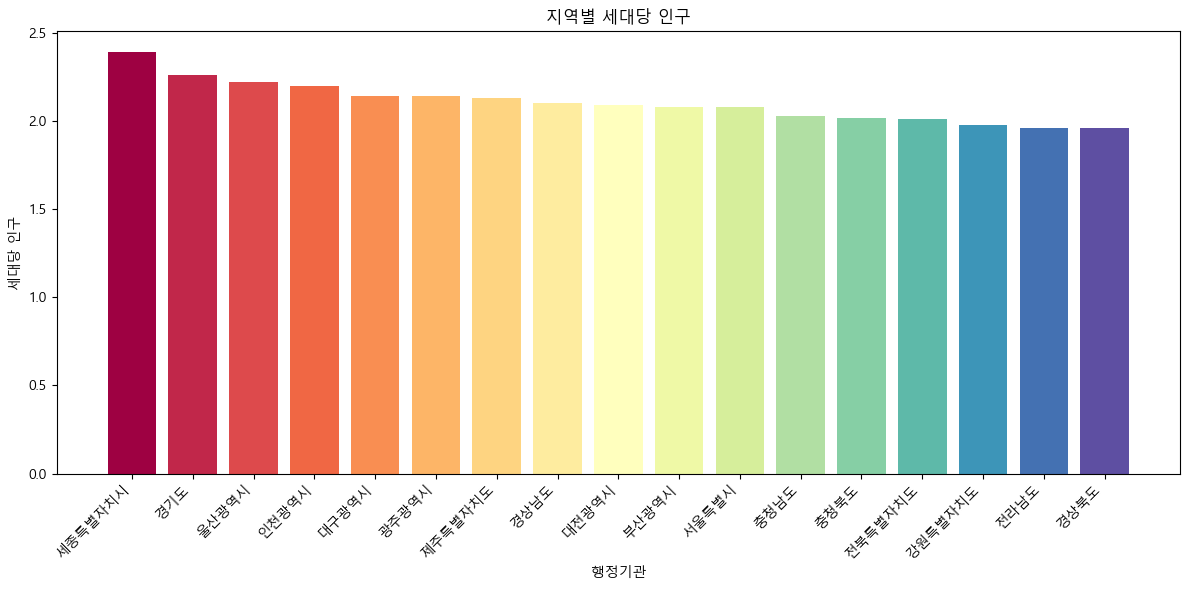

In [54]:
# 2-1 지역별 세대당 인구 Plot
# 지역별 세대당 인구 정렬
df_house_sorted = df.sort_values('세대당 인구', ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(df_house_sorted)))
bars = plt.bar(range(len(df_house_sorted)), df_house_sorted['세대당 인구'], color=colors)

plt.title('지역별 세대당 인구')
plt.xlabel('행정기관')
plt.ylabel('세대당 인구')
plt.xticks(range(len(df_house_sorted)), df_house_sorted['행정기관'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [51]:
# 3. 남녀 비율 분석
gender_ratio = df.sort_values('남여 비율', ascending=False)[['행정기관', '남여 비율']].reset_index(drop=True)
gender_ratio

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


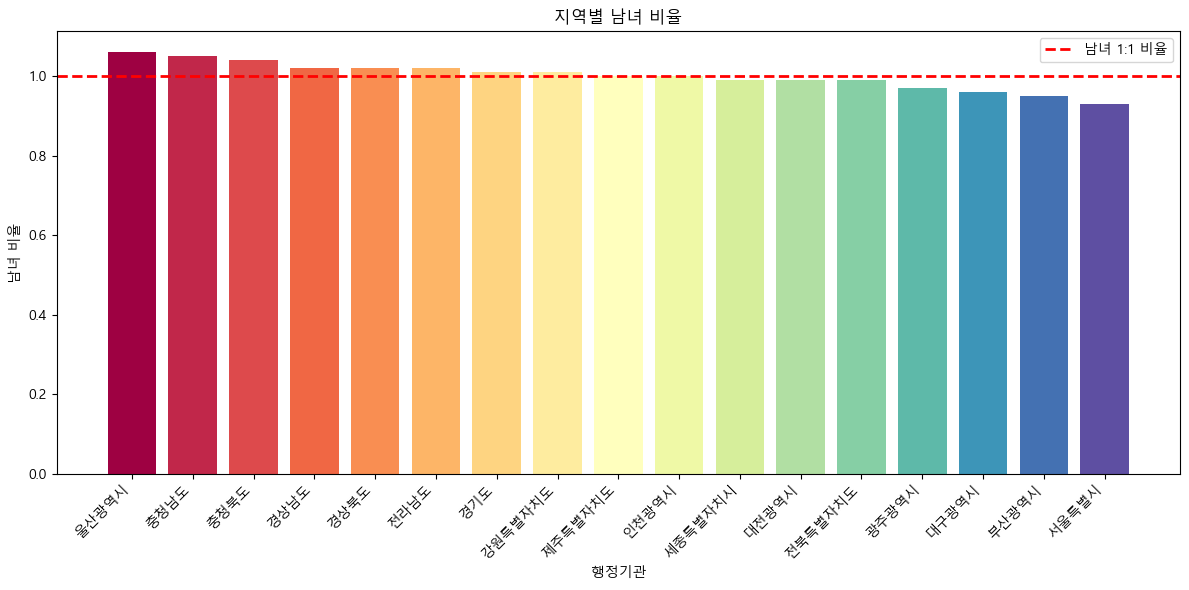

In [ ]:
# 3-1. 남녀 비율 분석 Plot
# 남녀 비율 정렬 (내림차순)
df_gender_sorted = df.sort_values('남여 비율', ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(df_gender_sorted)))
bars = plt.bar(range(len(df_gender_sorted)), df_gender_sorted['남여 비율'], color=colors)

plt.title('지역별 남녀 비율')
plt.xlabel('행정기관')
plt.ylabel('남녀 비율')
plt.xticks(range(len(df_gender_sorted)), df_gender_sorted['행정기관'], rotation=45, ha='right')

# 기준선
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='남녀 1:1 비율')
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
# 4. 남자초과/여자초과 분석
# 남초/여초 판별 컬럼 추가
def classify_gender(ratio):
    if ratio > 1.0:
        return '남초'
    elif ratio < 1.0:
        return '여초'
    else:
        return '동일'

df['남초여초'] = df['남여 비율'].apply(classify_gender)

# 결과 출력
result_df = df[['행정기관', '남여 비율', '남초여초']].reset_index(drop=True)
result_df.index = result_df.index + 1
result_df

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [71]:
# 5. 세대당 인구 평균보다 높은 지역
# 세대당 인구 평균 계산
avg_house = df['세대당 인구'].mean()
print(f'전국 평균 세대당 인구수: {avg_house:.2f}')

# 평균보다 높은 지역
above_avg = df[df['세대당 인구'] > avg_house][['행정기관', '세대당 인구']].sort_values('세대당 인구', ascending=False).reset_index(drop=True)
above_avg

전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


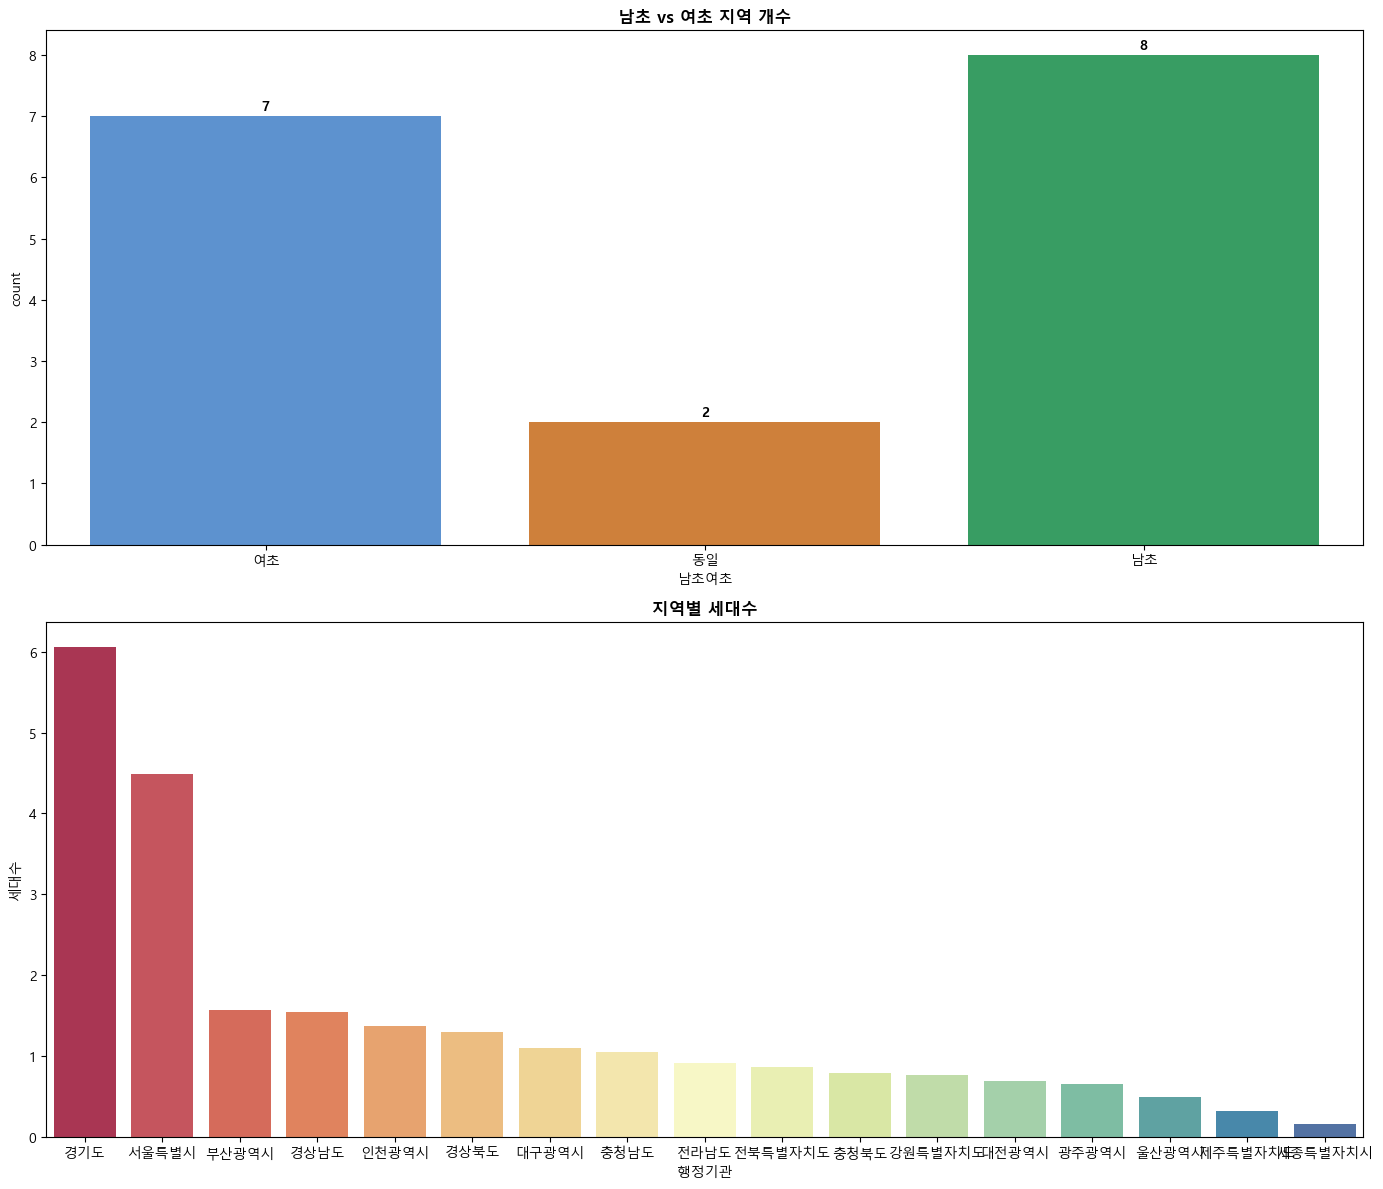

In [79]:
# 5-1 남초 vs 여초 개수 Plot  ( seaborn의 countplot )
#     지역별 세대수 Plot ( seaborn의 barplot )

# 두 개의 subplot 생성 (기존 방식 유지)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# 남초/여초 개수 Plot
status_order = ['여초', '동일', '남초']
sns.countplot(data=df, x='남초여초', hue='남초여초', palette=['#4A90E2', '#E67E22', '#27AE60'], 
              order=status_order, ax=ax1, legend=False)
ax1.set_title('남초 vs 여초 지역 개수', fontweight='bold')

# 숫자 표시
counts = df['남초여초'].value_counts().reindex(status_order, fill_value=0)
for i, v in enumerate(counts):
    ax1.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# 지역별 세대수 Plot
df_sorted = df.sort_values('세대수', ascending=False)
sns.barplot(data=df_sorted, x='행정기관', y='세대수', hue='행정기관', palette='Spectral', ax=ax2, legend=False)
ax2.set_title('지역별 세대수', fontweight='bold')

# 축 설정
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}".format(x / 1000000)))

plt.tight_layout()
plt.show()

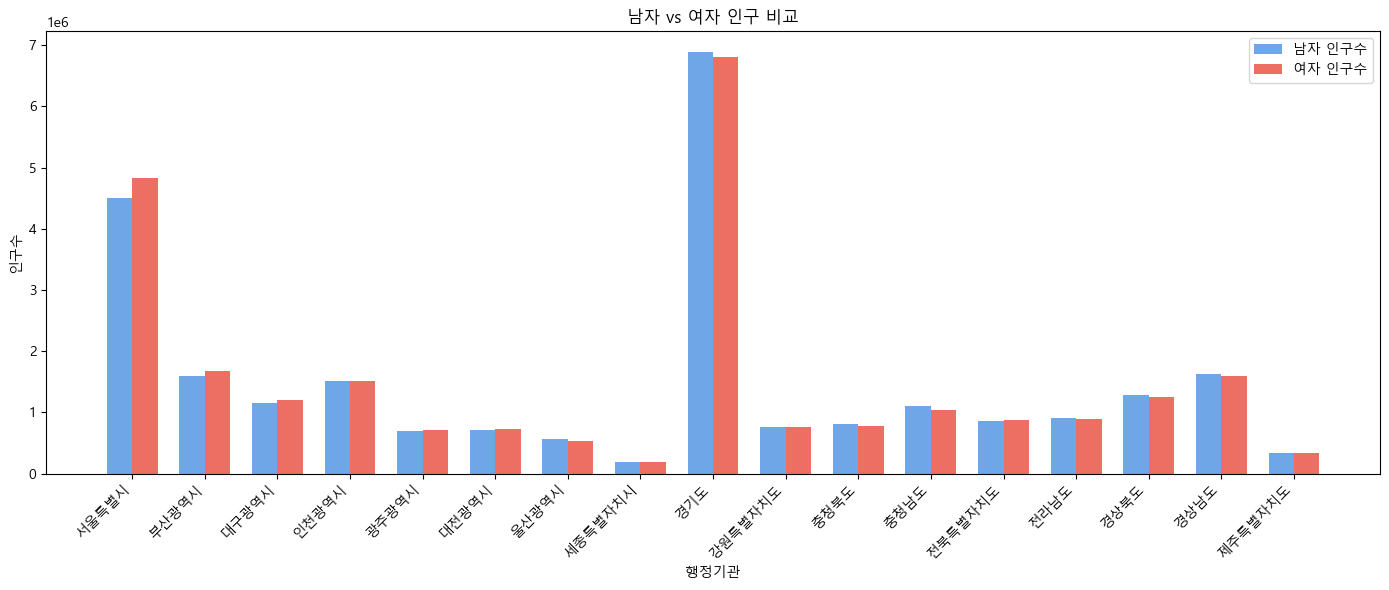

In [84]:
# 6. 남자 인구 vs 여자 인구 비교 Plot
# 남자/여자 인구 비교 그래프
plt.figure(figsize=(14, 6))

x = np.arange(len(df))
width = 0.35

bars1 = plt.bar(x - width/2, df['남자 인구수'], width, label='남자 인구수', color='#4A90E2', alpha=0.8)
bars2 = plt.bar(x + width/2, df['여자 인구수'], width, label='여자 인구수', color='#E94B3C', alpha=0.8)

plt.title('남자 vs 여자 인구 비교')
plt.xlabel('행정기관')
plt.ylabel('인구수')
plt.xticks(x, df['행정기관'], rotation=45, ha='right')
plt.legend()

# y축 과학적 표기법
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()